In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df=pd.read_csv('/home/majdi/Downloads/FuelConsumptionCo2.csv')

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
#In this notebook i'm gonna build a simple linear regression model and predict the co2emissions from enginesize
Odata=df[['ENGINESIZE','CO2EMISSIONS']]


In [9]:
Odata.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(Odata[['ENGINESIZE']],Odata[['CO2EMISSIONS']],test_size=0.199,random_state=100)


In [25]:
print(X_test.shape,X_train.shape)

(213, 1) (854, 1)


In [26]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
"The Coefficient is {} and the intercept is {} ".format(reg.coef_[[0]],reg.intercept_[0])

'The Coefficient is [[39.37093337]] and the intercept is 124.65133629783887 '

In [28]:
reg.score(X_test,Y_test)

0.7791909962227446

In [30]:
np.mean(np.absolute(reg.predict(X_test)-Y_test))

CO2EMISSIONS    22.35625
dtype: float64

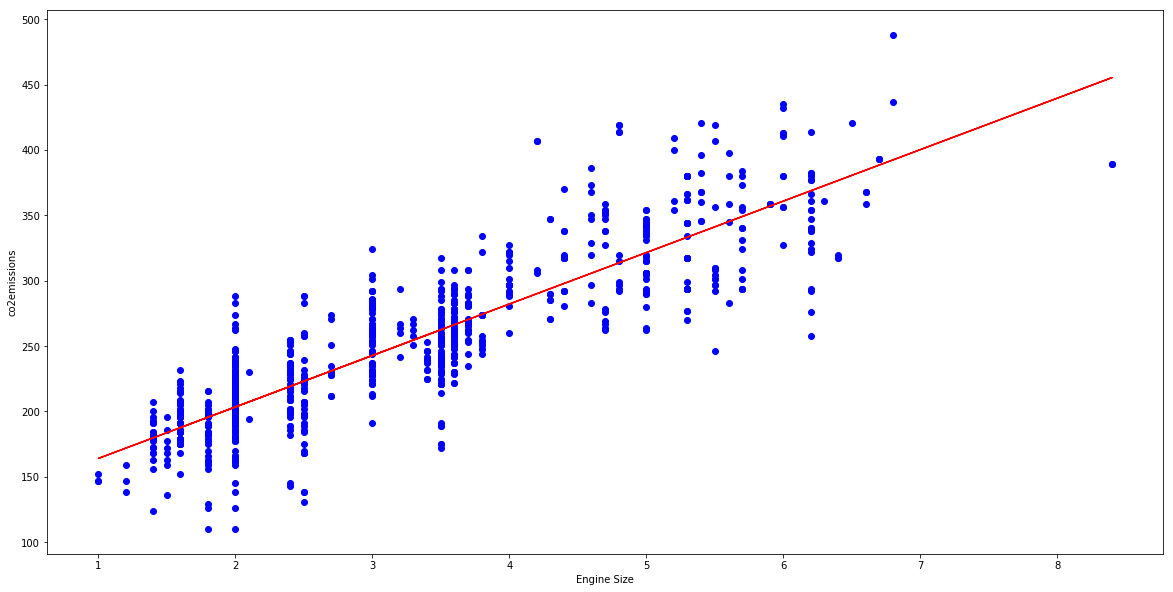

In [54]:
fig=plt.figure(figsize=(20,10))
plt.scatter(X_train,Y_train,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('co2emissions')
plt.plot(X_train,reg.coef_[[0]]*X_train+reg.intercept_[0],color='red')

